# Previsão de Preços com Inteligencia Artificial
---

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Algoritimo Ciência de Dados

1) Entendimento do Problema
2) Entendimento da Empresa
3) Extração/Obtenção de Dados
4) Ajuste de Dados (Tratamento/Limpeza)
5) Análise Exploratória
6) Modelagem + Algoritmos + Modelo IA
7) Interpretação de Resultados

![title](tabelas.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
#Limpeza de Dados

tabela = pd.read_csv('./barcos_ref.csv')
tabela

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


## Análise Exploratoria

- Qual variavel da tabela mais impacta no preço?
- Qual caracterista mais importa no preço do barco?

In [3]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB


In [4]:
tabela.describe()

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
count,7.649000e+03,7649.000000,7649.000000,7649.000000,7649.000000,7649.000000,7649.000000
mean,2.715067e+05,10.842332,1.881815,2004.131651,11.684420,3.540520,3.729376
std,7.285590e+05,5.147407,0.486099,17.153840,5.942353,1.167182,1.420754
min,3.399000e+03,1.000000,1.000000,1885.000000,1.040000,0.860000,1.000000
25%,4.400000e+04,6.000000,2.000000,1998.000000,7.600000,2.550000,3.000000
50%,9.227100e+04,13.000000,2.000000,2007.000000,10.450000,3.350000,3.000000
75%,2.427500e+05,13.000000,2.000000,2017.000000,13.990000,4.250000,4.000000
max,2.350000e+07,25.000000,4.000000,2021.000000,100.000000,16.000000,11.000000


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


<Axes: >

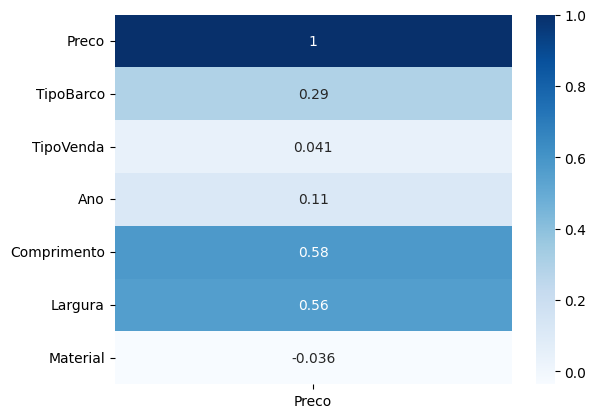

In [5]:
# Calculando a correlçaõ na Coluna Preço
correlacao = tabela.corr()[['Preco']]
display(correlacao)

def gerarGrafico(f):
    fig, ax = plt.subplots()
    grafico = ax.bar(correlacao,f)

sns.heatmap(correlacao, cmap = 'Blues',annot=True)


0.4490324760735811
0.8558832372942993


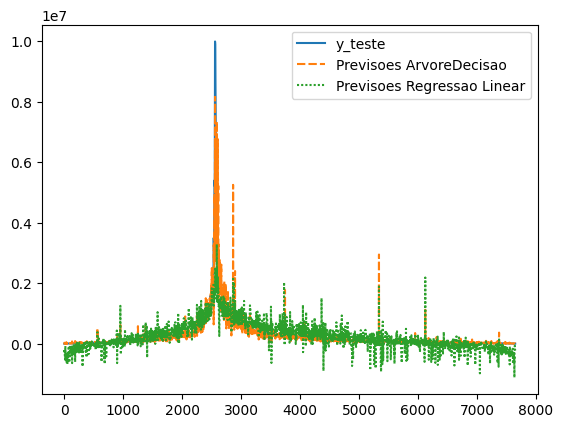

In [6]:
#Criando Modelo
y = tabela['Preco']
x = tabela.drop('Preco', axis= 1)
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3, random_state=1)

#Criação da IA
modelo_regressaoLinear = LinearRegression()
modelo_ArvoreDecisao = RandomForestRegressor()
modelo_regressaoLinear.fit(x_treino,y_treino)
modelo_ArvoreDecisao.fit(x_treino,y_treino)
previsao_regressaoLinear = modelo_regressaoLinear.predict(x_teste)
previsao_ArvoreDecisao = modelo_ArvoreDecisao.predict(x_teste)


#Gerando os resultdos
print(r2_score(y_teste,previsao_regressaoLinear))
print(r2_score(y_teste,previsao_ArvoreDecisao))
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_ArvoreDecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaoLinear

# plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [7]:
nova_tabela = pd.read_csv("novos_barcos.csv")
display(nova_tabela)
previsao = modelo_ArvoreDecisao.predict(nova_tabela)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5534.91833333  8905.99333333 18174.5       ]
